In [28]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import semimage

from scipy import ndimage 
from skimage import io, img_as_float

import pickle
import os, glob, shutil, random

In [2]:
img_dir = '/Users/nik/Dropbox/cnt_filter/original'
test_dir = '/Users/nik/Dropbox/cnt_filter/test'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/chapter3'
os.chdir(test_dir)

In [5]:
# get the filelist
filelist = pickle.load( open( "filelist.p", "rb" ) )
tlist = [filelist[i] for i in [3,20]] # subset of filelist to test

In [7]:
# get the image arrays
# using the same images as the matched filter bank
NY = 768; NX = 1024
imarray = np.zeros((len(tlist),NY,NX))
for i, t in enumerate(tlist):
    imarray[i] = img_as_float(ndimage.imread(tlist[i]))

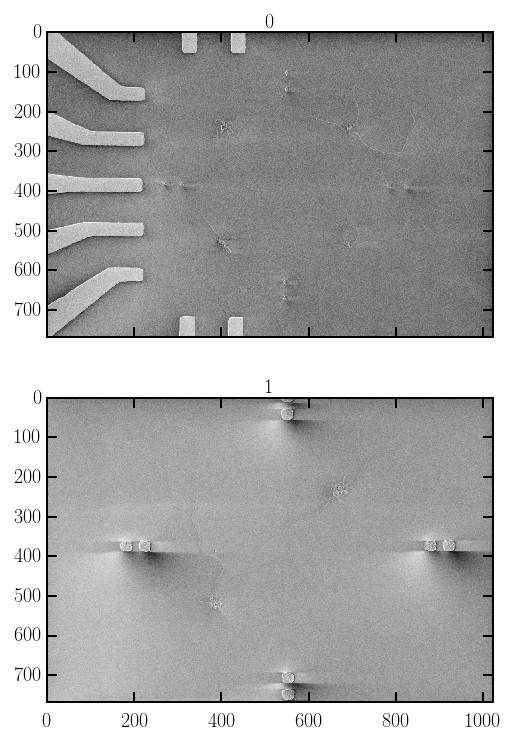

In [10]:
fig, axs = plt.subplots(len(imarray),1,sharex = True, sharey=False, 
                        figsize=(1*8,len(imarray)*6))
axs = axs.flat

for i, im in enumerate(imarray):
    axs[i].imshow(im, cmap = plt.cm.gray, aspect = 'auto', interpolation = 'nearest')
    axs[i].set_title(i)

Going to recreate the figure here: http://en.wikipedia.org/wiki/Histogram_equalization#Full-sized_image using that first image.

In [60]:
def scale_linear(a, high=1.0, low=0.0):
    mins = a.min()
    maxs = a.max()
    rng = maxs - mins
    return high - (((high - low) * (maxs - a)) / rng)

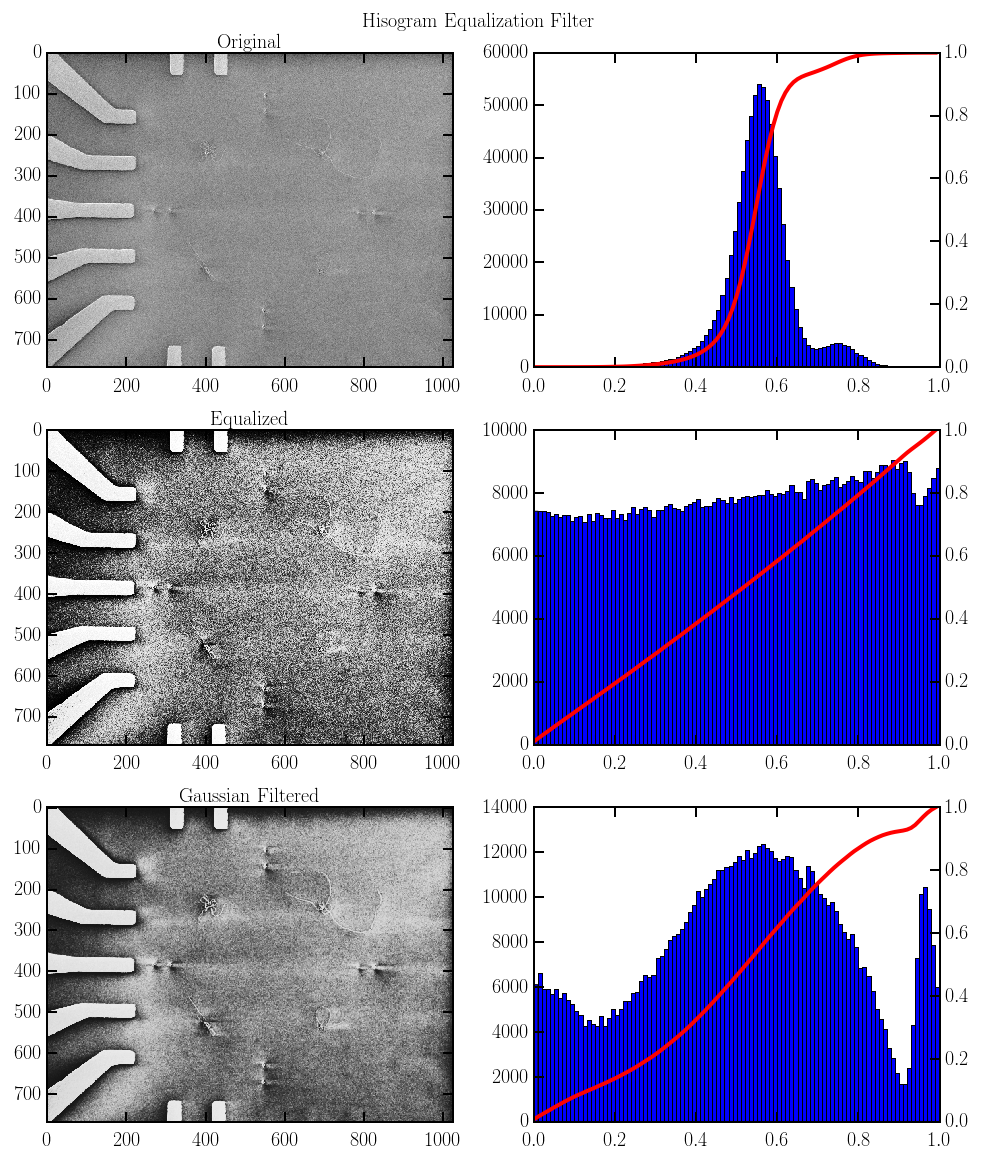

In [107]:
reload(semimage)

im = imarray[0]
im = scale_linear(semimage.plane_fit(im))

fig, axs = plt.subplots(3,2 ,sharex = False, sharey=False, 
                        figsize=(2*8,3*6))

axs[0,0].imshow(im, aspect = 'auto', interpolation = 'nearest')
axs[0,0].set_title('Original')

n, bins, patches = axs[0,1].hist(im.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
cdfo = n.cumsum() #cumulative distribution function
cdfo = 1.0 * cdfo / cdfo[-1]
# print len(bins), len(cdfo)
ax1 = axs[0,1].twinx() 
ax1.plot(bins[:-1], cdfo, 'r-')

imhist = semimage.histeq(im)
axs[1,0].imshow(imhist, aspect = 'auto', interpolation = 'nearest')
axs[1,0].set_title('Equalized')
    
n, bins, patches = axs[1,1].hist(imhist.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
cdfh = n.cumsum() #cumulative distribution function
cdfh = 1.0 * cdfh / cdfh[-1]
#print len(bins), len(cdfo)
ax2 = axs[1,1].twinx() 
ax2.plot(bins[:-1], cdfh, 'r-')

imfilt = ndimage.filters.median_filter(imhist, size=(3,3))
axs[2,0].imshow(imfilt, aspect = 'auto', interpolation = 'nearest', 
               vmin = -0.1, vmax = 1.1)
axs[2,0].set_title('Gaussian Filtered')
    
n, bins, patches = axs[2,1].hist(imfilt.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
axs[2,1].set_xlim(0,1.0)
# axs[2,1].set_ylim(0,10000)
cdff = n.cumsum() #cumulative distribution function
cdff = 1.0 * cdff / cdff[-1]
#print len(bins), len(cdfo)
ax2 = axs[2,1].twinx() 
ax2.plot(bins[:-1], cdff, 'r-')

fig.suptitle('Hisogram Equalization Filter')
fig.subplots_adjust(top=0.95)
fig.savefig(os.path.join(fig_dir,'histogram_eq_example.pdf'), format='pdf', dpi=300)

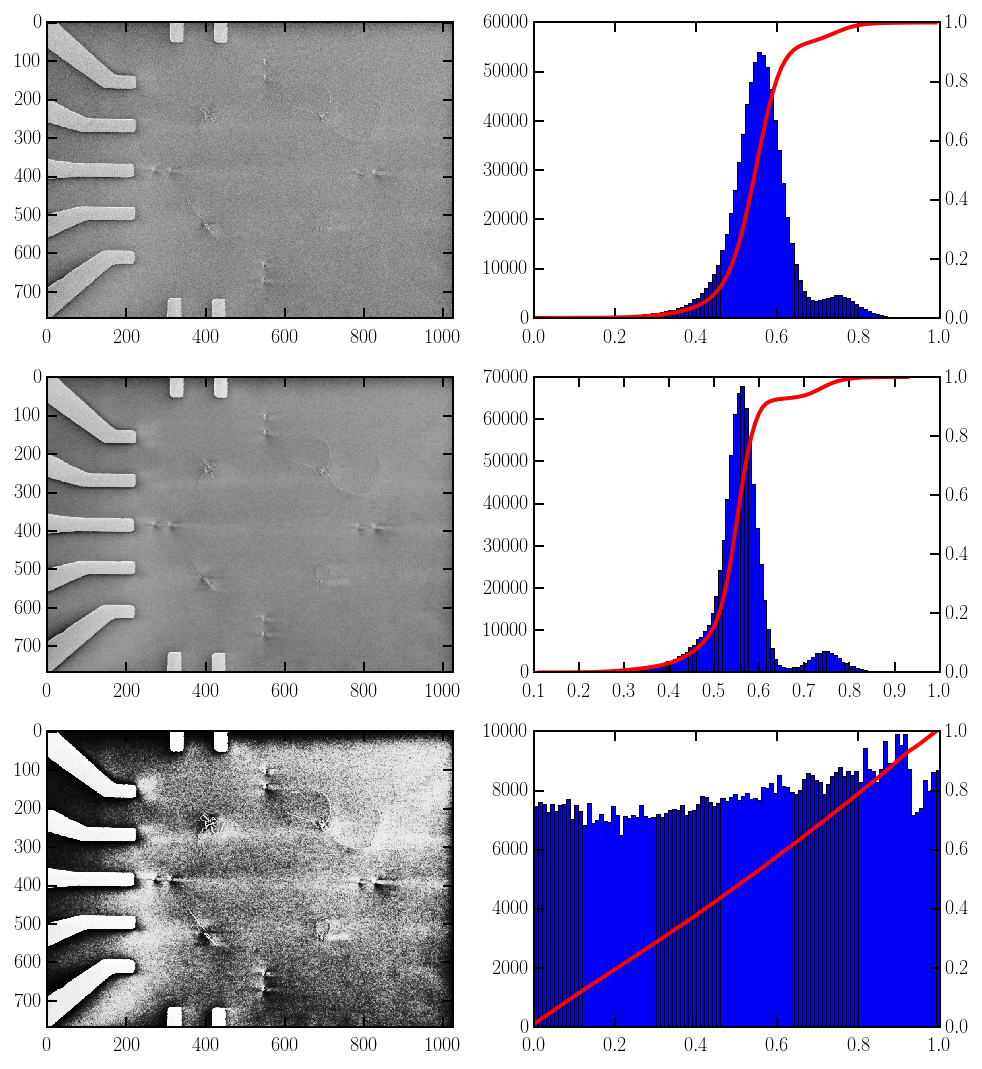

In [103]:
reload(semimage)

im = imarray[0]
im = scale_linear(semimage.plane_fit(im))

fig, axs = plt.subplots(3,2 ,sharex = False, sharey=False, 
                        figsize=(2*8,3*6))

axs[0,0].imshow(im, aspect = 'auto', interpolation = 'nearest')

n, bins, patches = axs[0,1].hist(im.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
cdfo = n.cumsum() #cumulative distribution function
cdfo = 1.0 * cdfo / cdfo[-1]
# print len(bins), len(cdfo)
ax1 = axs[0,1].twinx() 
ax1.plot(bins[:-1], cdfo, 'r-')

imfilt = ndimage.filters.median_filter(im, size=(3,3))
axs[1,0].imshow(imfilt, aspect = 'auto', interpolation = 'nearest')
    
n, bins, patches = axs[1,1].hist(imfilt.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
axs[1,1].set_xlim(0,1.0)
# axs[2,1].set_ylim(0,10000)
cdff = n.cumsum() #cumulative distribution function
cdff = 1.0 * cdff / cdff[-1]
#print len(bins), len(cdfo)
ax2 = axs[1,1].twinx() 
ax2.plot(bins[:-1], cdff, 'r-')

imhist = semimage.histeq(imfilt)
axs[2,0].imshow(imhist, aspect = 'auto', interpolation = 'nearest', vmin = 0.0, vmax = 1.0)
    
n, bins, patches = axs[2,1].hist(imhist.flatten(), bins = 100, normed = False) # histtype='bar', rwidth=0.8)
cdfh = n.cumsum() #cumulative distribution function
cdfh = 1.0 * cdfh / cdfh[-1]
#print len(bins), len(cdfo)
ax2 = axs[2,1].twinx() 
ax2.plot(bins[:-1], cdfh, 'r-')

fig.savefig(os.path.join(fig_dir,'histogram_eq_example.pdf'), format='pdf', dpi=300)